In [12]:
import numpy as np
import matplotlib.pyplot as plt

vand_mat = [None for _ in range(4)]

years = np.array([t for t in range(1900, 1990, 10)], dtype=np.double)

def phi(n):
    match n:
        case 1: return lambda x: x
        case 2: return lambda x: x-1900
        case 3: return lambda x: x-1940
        case 4: return lambda x: (x-1940)/40

for i in range(1, 5):
    vand_mat[i-1] = np.vander(phi(i)(years), increasing=True)
    print(f"Współczynnik uwarunkowania dla phi_{i}: {np.linalg.cond(vand_mat[i-1])}")

# Macierz o najmniejszym współczynniku uwarunkowania
V = vand_mat[-1]
print(V)


Współczynnik uwarunkowania dla phi_1: 5.358755978872505e+36
Współczynnik uwarunkowania dla phi_2: 5865679823403680.0
Współczynnik uwarunkowania dla phi_3: 9315536043860.412
Współczynnik uwarunkowania dla phi_4: 1605.443700478673
[[ 1.00000000e+00 -1.00000000e+00  1.00000000e+00 -1.00000000e+00
   1.00000000e+00 -1.00000000e+00  1.00000000e+00 -1.00000000e+00
   1.00000000e+00]
 [ 1.00000000e+00 -7.50000000e-01  5.62500000e-01 -4.21875000e-01
   3.16406250e-01 -2.37304688e-01  1.77978516e-01 -1.33483887e-01
   1.00112915e-01]
 [ 1.00000000e+00 -5.00000000e-01  2.50000000e-01 -1.25000000e-01
   6.25000000e-02 -3.12500000e-02  1.56250000e-02 -7.81250000e-03
   3.90625000e-03]
 [ 1.00000000e+00 -2.50000000e-01  6.25000000e-02 -1.56250000e-02
   3.90625000e-03 -9.76562500e-04  2.44140625e-04 -6.10351562e-05
   1.52587891e-05]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 1.00000000e+0

### Obliczenie współczynników wielomianu interpolacyjnego

In [13]:
y = np.array([
    76212168,
    92228496,
    106021537,
    123202624,
    132164569,
    151325798,
    179323175,
    203302031,
    226542199])

a = np.linalg.solve(V, y)

### Rysowanie wielomianu interpolacyjnego

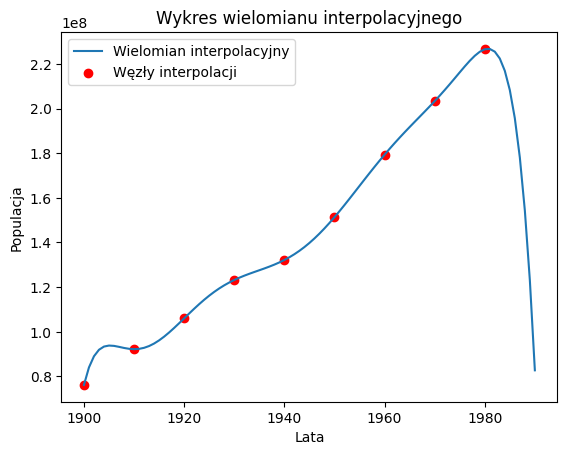

In [14]:
# Algorytm Hornera z wykładu
def horner(a, x):
    result = 0
    for ai in a[::-1]:
        result = result * x + ai
    return result

xs = np.arange(1900, 1991, 1)
ys = horner(a, (xs - 1940)/40)

plt.plot(xs, ys, label="Wielomian interpolacyjny")
plt.scatter(years, y, color="red", label="Węzły interpolacji")
plt.legend()
plt.title("Wykres wielomianu interpolacyjnego")
plt.xlabel("Lata")
plt.ylabel("Populacja")
plt.show()

### Teraz ekstrapolujemy wielomian do 1990

In [15]:
extrapolated = ys[-1]
actual = 248709873
print(f"Wartość oczekiwana: {actual}, wartość ekstrapolowana: {round(extrapolated, 2)}")
print(f"Błąd względny: {round(abs(extrapolated-actual)/actual, 6)}")

Wartość oczekiwana: 248709873, wartość ekstrapolowana: 82749141.0
Błąd względny: 0.667286


### Wielomian interpolacyjny Lagrange'a

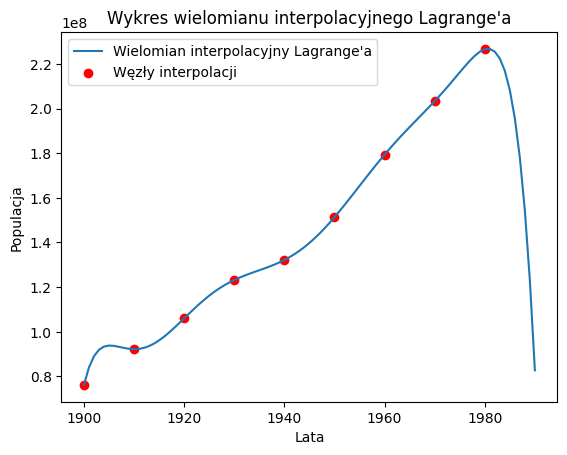

In [ ]:
def lagrange_interpolation(x: np.ndarray, x_values, y_values):
    d = np.zeros(len(x_values))
    result = np.zeros(len(x))
    for i in range(len(x_values)):
        # Mianownik jest niezależny od x
        # d[i] = (xi-x0)(xi-x1)....(xi-x(i-1))(xi-x(i+1))...(xi-xn)
        d[i] = np.prod(x_values[i] - x_values[:i]) * np.prod(x_values[i] - x_values[i+1:])

    for i in range(len(y_values)):
        term = y_values[i]
        for j in range(len(y_values)):
            if i != j:
                term *= (x - x_values[j])
        result += term / d[i]
    
    return result

    
ys = lagrange_interpolation(xs, years, y)

plt.plot(xs, ys, label="Wielomian interpolacyjny Lagrange'a")
plt.scatter(years, y, color="red", label="Węzły interpolacji")
plt.legend()
plt.title("Wykres wielomianu interpolacyjnego Lagrange'a")
plt.xlabel("Lata")
plt.ylabel("Populacja")
plt.show()

### Błąd metody Lagrange'a

In [17]:
extrapolated = ys[-1]
actual = 248709873
print(f"Wartość oczekiwana: {actual}, wartość ekstrapolowana: {round(extrapolated, 2)}")
print(f"Błąd względny: {round(abs(extrapolated-actual)/actual, 6)}")

Wartość oczekiwana: 248709873, wartość ekstrapolowana: 82749141.0
Błąd względny: 0.667286


### Wielomian interpolacyjny Newtona

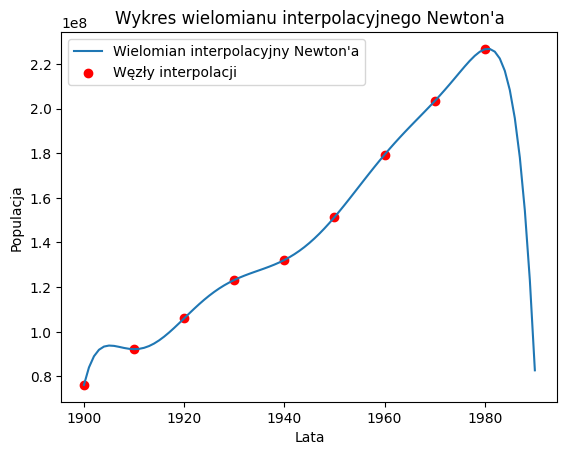

In [18]:
def newton_interpolation(x, x_values, y_values):
    n = len(x_values)
    M = np.array(y_values, copy=True, dtype=np.double)

    for i in range(1, n):
        M[i : n] = (M[i : n] - M[i-1]) / (x_values[i : n] - x_values[i-1])

    p = np.ones(shape = (n, len(x)))
    
    for i in range(1, n):
        for j in range(i):
            p[i] *= (x - x_values[j])

    return np.linalg.matmul(M, p)



ys = newton_interpolation(xs, years, y)

plt.plot(xs, ys, label="Wielomian interpolacyjny Newton'a")
plt.scatter(years, y, color="red", label="Węzły interpolacji")
plt.legend()
plt.title("Wykres wielomianu interpolacyjnego Newton'a")
plt.xlabel("Lata")
plt.ylabel("Populacja")
plt.show()


### Błąd metody Newtona

In [19]:
extrapolated = ys[-1]
actual = 248709873
print(f"Wartość oczekiwana: {actual}, wartość ekstrapolowana: {round(extrapolated, 2)}")
print(f"Błąd względny: {round(abs(extrapolated-actual)/actual, 6)}")

Wartość oczekiwana: 248709873, wartość ekstrapolowana: 82749141.0
Błąd względny: 0.667286


### Teraz użyję ponownie pierwszej metody, ale z zaokąglonymi danymi

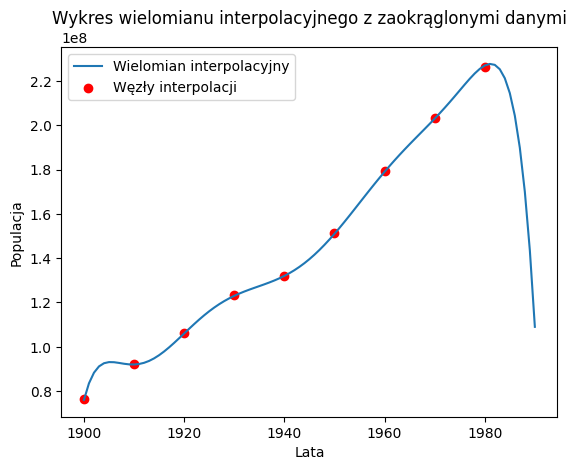

In [20]:
y_rounded = np.round(y, decimals=-6)
a = np.linalg.solve(V, y_rounded)
ys = horner(a, (xs - 1940)/40)

plt.plot(xs, ys, label="Wielomian interpolacyjny")
plt.scatter(years, y, color="red", label="Węzły interpolacji")
plt.legend()
plt.title("Wykres wielomianu interpolacyjnego z zaokrąglonymi danymi")
plt.xlabel("Lata")
plt.ylabel("Populacja")
plt.show()

### Błąd względny

In [21]:
extrapolated = ys[-1]
actual = 248709873
print(f"Wartość oczekiwana: {actual}, wartość ekstrapolowana: {round(extrapolated, 2)}")
print(f"Błąd względny: {round(abs(extrapolated-actual)/actual, 6)}")

Wartość oczekiwana: 248709873, wartość ekstrapolowana: 109000000.0
Błąd względny: 0.561738


W metodach Lagrange'a i Newton'a nie było widocznej zmiany w dokładności ekstrapolacji, natomiast tutaj jest już widoczna.